In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from lightgbm import LGBMRegressor
# class sklearn.model_selection.StratifiedKFold(n_splits=5,
#     shuffle=False, random_state=None)
from typing import Union, Tuple
import warnings
warnings.simplefilter('ignore')
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/data_for_revise/prediction/payments/支出金額全データ_サロン名除去.csv')
df

,県,エリア,セット面の数,ブログ投稿数,口コミ数,スタッフ数,クーポン数,メニュー数,スタイル数,駅徒歩,コメントへの返信率,カット選択,カラー選択,トリートメント選択,パーマ選択,縮毛矯正選択,その他選択,ヘッドスパ選択,ヘアセット選択,エクステ選択,着付け選択,メニュー無し選択,イルミナメニュー化の有無,Aujuaメニュー化の有無,addicthyメニュー化の有無,inoaメニュー化の有無,支出金額
0,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4950
1,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,13990
2,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4950
3,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4950
4,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269213,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,6160
269214,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4620
269215,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3520
269216,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3520


In [3]:
df.loc[
    ((df['カット選択']==0)&(df['カラー選択']==0)&(df['トリートメント選択']==0)&(df['パーマ選択']==0)&(df['縮毛矯正選択']==0)&(df['その他選択']==0)&\
     (df['ヘッドスパ選択']==0)&(df['ヘアセット選択']==0)&(df['エクステ選択']==1)&(df['着付け選択']==0)),
     :
]

,県,エリア,セット面の数,ブログ投稿数,口コミ数,スタッフ数,クーポン数,メニュー数,スタイル数,駅徒歩,コメントへの返信率,カット選択,カラー選択,トリートメント選択,パーマ選択,縮毛矯正選択,その他選択,ヘッドスパ選択,ヘアセット選択,エクステ選択,着付け選択,メニュー無し選択,イルミナメニュー化の有無,Aujuaメニュー化の有無,addicthyメニュー化の有無,inoaメニュー化の有無,支出金額
105,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,26500
122,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,26400
125,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,26400
3694,広島,八丁堀・幟町・胡町,8,411,275,9,36,53,187,NaN,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6600
3741,広島,八丁堀・幟町・胡町,8,411,275,9,36,53,187,NaN,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,14790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267546,福山・尾道,福山駅前・三吉周辺,2,122,43,2,18,18,44,NaN,1.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19700
267547,福山・尾道,福山駅前・三吉周辺,2,122,43,2,18,18,44,NaN,1.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,21600
267548,福山・尾道,福山駅前・三吉周辺,2,122,43,2,18,18,44,NaN,1.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19700
267549,福山・尾道,福山駅前・三吉周辺,2,122,43,2,18,18,44,NaN,1.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,21600


In [4]:
# データフレームを整えていく。
# メニュー無し選択はいらない
df = df.drop('メニュー無し選択', axis=1)


In [5]:
df.loc[
    ((df['カット選択']==0)&(df['カラー選択']==0)&(df['トリートメント選択']==0)&(df['パーマ選択']==0)&(df['縮毛矯正選択']==0)&(df['その他選択']==0)&\
     (df['ヘッドスパ選択']==0)&(df['ヘアセット選択']==0)&(df['エクステ選択']==1)&(df['着付け選択']==0)),
     :
]

,県,エリア,セット面の数,ブログ投稿数,口コミ数,スタッフ数,クーポン数,メニュー数,スタイル数,駅徒歩,コメントへの返信率,カット選択,カラー選択,トリートメント選択,パーマ選択,縮毛矯正選択,その他選択,ヘッドスパ選択,ヘアセット選択,エクステ選択,着付け選択,イルミナメニュー化の有無,Aujuaメニュー化の有無,addicthyメニュー化の有無,inoaメニュー化の有無,支出金額
105,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,0,0,0,0,0,1,0,0,0,0,0,26500
122,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,0,0,0,0,0,1,0,0,0,0,0,26400
125,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,0,0,0,0,0,1,0,0,0,0,0,26400
3694,広島,八丁堀・幟町・胡町,8,411,275,9,36,53,187,NaN,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6600
3741,広島,八丁堀・幟町・胡町,8,411,275,9,36,53,187,NaN,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,14790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267546,福山・尾道,福山駅前・三吉周辺,2,122,43,2,18,18,44,NaN,1.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19700
267547,福山・尾道,福山駅前・三吉周辺,2,122,43,2,18,18,44,NaN,1.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21600
267548,福山・尾道,福山駅前・三吉周辺,2,122,43,2,18,18,44,NaN,1.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19700
267549,福山・尾道,福山駅前・三吉周辺,2,122,43,2,18,18,44,NaN,1.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21600


In [6]:
_index = df.loc[
    ((df['カット選択']==0)&(df['カラー選択']==0)&(df['トリートメント選択']==0)&(df['パーマ選択']==0)&(df['縮毛矯正選択']==0)&(df['その他選択']==0)&\
     (df['ヘッドスパ選択']==0)&(df['ヘアセット選択']==0)&(df['エクステ選択']==1)&(df['着付け選択']==0)),
     :
].index

In [7]:
_index

Int64Index([   105,    122,    125,   3694,   3741,   3796,   3800,   4610,
              4611,   4612,
            ...
            267541, 267542, 267543, 267544, 267545, 267546, 267547, 267548,
            267549, 267550],
           dtype='int64', length=1183)

In [8]:
df = df.drop(_index).reset_index(drop=True)

In [9]:
df

,県,エリア,セット面の数,ブログ投稿数,口コミ数,スタッフ数,クーポン数,メニュー数,スタイル数,駅徒歩,コメントへの返信率,カット選択,カラー選択,トリートメント選択,パーマ選択,縮毛矯正選択,その他選択,ヘッドスパ選択,ヘアセット選択,エクステ選択,着付け選択,イルミナメニュー化の有無,Aujuaメニュー化の有無,addicthyメニュー化の有無,inoaメニュー化の有無,支出金額
0,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4950
1,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13990
2,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4950
3,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4950
4,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268030,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,6160
268031,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4620
268032,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3520
268033,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3520


In [10]:
_index =\
df.loc[
    ((df['カット選択']==0)&(df['カラー選択']==0)&(df['トリートメント選択']==0)&(df['パーマ選択']==0)&(df['縮毛矯正選択']==0)&(df['その他選択']==0)&\
     (df['ヘッドスパ選択']==0)&(df['ヘアセット選択']==1)&(df['エクステ選択']==0)&(df['着付け選択']==0)),
     :
].index

In [11]:
df = df.drop(_index).reset_index(drop=True)

In [12]:
len(df)

267102

In [13]:
_index =\
df.loc[
    ((df['カット選択']==0)&(df['カラー選択']==0)&(df['トリートメント選択']==0)&(df['パーマ選択']==0)&(df['縮毛矯正選択']==0)&(df['その他選択']==1)&\
     (df['ヘッドスパ選択']==0)&(df['ヘアセット選択']==0)&(df['エクステ選択']==0)&(df['着付け選択']==0)),
     :
].index

In [14]:
len(_index)

615

In [15]:
df = df.drop(_index).reset_index(drop=True)

In [16]:
len(df)

266487

In [17]:
_index =\
df.loc[
    ((df['カット選択']==0)&(df['カラー選択']==0)&(df['トリートメント選択']==0)&(df['パーマ選択']==0)&(df['縮毛矯正選択']==0)&(df['その他選択']==1)&\
     (df['ヘッドスパ選択']==0)&(df['ヘアセット選択']==1)&(df['エクステ選択']==0)&(df['着付け選択']==0)),
     :
].index

In [18]:
df = df.drop(_index).reset_index(drop=True)

In [19]:
_index =\
df.loc[
    ((df['カット選択']==0)&(df['カラー選択']==0)&(df['トリートメント選択']==0)&(df['パーマ選択']==0)&(df['縮毛矯正選択']==0)&(df['その他選択']==1)&\
     (df['ヘッドスパ選択']==1)&(df['ヘアセット選択']==0)&(df['エクステ選択']==0)&(df['着付け選択']==0)),
     :
].index

In [20]:
df = df.drop(_index).reset_index(drop=True)

In [21]:
# df = df.drop_duplicates().reset_index(drop=True)

In [22]:
df

,県,エリア,セット面の数,ブログ投稿数,口コミ数,スタッフ数,クーポン数,メニュー数,スタイル数,駅徒歩,コメントへの返信率,カット選択,カラー選択,トリートメント選択,パーマ選択,縮毛矯正選択,その他選択,ヘッドスパ選択,ヘアセット選択,エクステ選択,着付け選択,イルミナメニュー化の有無,Aujuaメニュー化の有無,addicthyメニュー化の有無,inoaメニュー化の有無,支出金額
0,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4950
1,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13990
2,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4950
3,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4950
4,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266282,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5390
266283,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4620
266284,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3520
266285,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3520


In [23]:
# ヘアセットは思い切って消す。
df[df['ヘアセット選択']==1].index

df = df.drop(df[df['ヘアセット選択']==1].index).reset_index(drop=True)

In [24]:
# エクステも思い切って消す。
df[df['エクステ選択']==1].index

df = df.drop(df[df['エクステ選択']==1].index).reset_index(drop=True)

In [25]:
# 着付けも思い切って消す。
df[df['着付け選択']==1].index

df = df.drop(df[df['着付け選択']==1].index).reset_index(drop=True)

In [26]:
df = df.drop(columns=['ヘアセット選択', 'エクステ選択', '着付け選択'])
df

,県,エリア,セット面の数,ブログ投稿数,口コミ数,スタッフ数,クーポン数,メニュー数,スタイル数,駅徒歩,コメントへの返信率,カット選択,カラー選択,トリートメント選択,パーマ選択,縮毛矯正選択,その他選択,ヘッドスパ選択,イルミナメニュー化の有無,Aujuaメニュー化の有無,addicthyメニュー化の有無,inoaメニュー化の有無,支出金額
0,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,4950
1,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,1,0,0,0,0,0,0,0,13990
2,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,1,0,0,0,0,0,0,0,0,4950
3,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,4950
4,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,4950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264667,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,0,1,0,0,0,0,5390
264668,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,0,1,0,0,0,0,4620
264669,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,3520
264670,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,3520


In [27]:
len(df)

264672

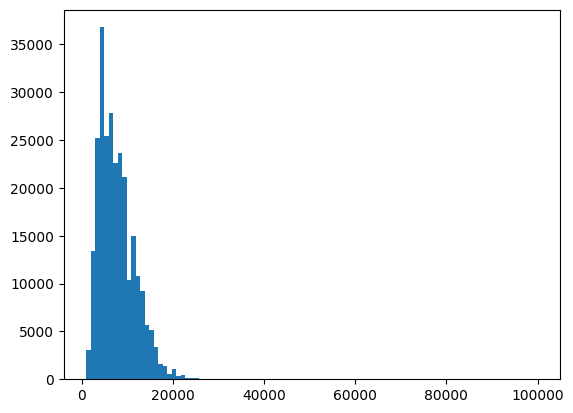

In [28]:
import matplotlib.pyplot as plt
fig = plt.hist(df['支出金額'], bins=100)

In [29]:
# 外れ値を削除する。
df = df[df['支出金額'] <= 23000].reset_index(drop=True)

(array([21281., 65254., 56652., 46152., 37241., 20698.,  9821.,  4054.,
         2136.,   809.]),
 array([ 1000.,  3200.,  5400.,  7600.,  9800., 12000., 14200., 16400.,
        18600., 20800., 23000.]),
 <BarContainer object of 10 artists>)

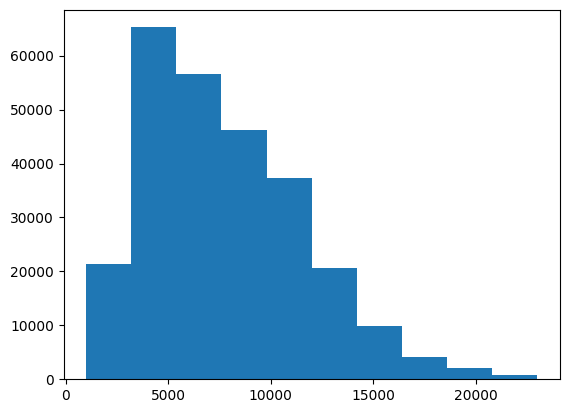

In [30]:
import matplotlib.pyplot as plt
plt.hist(df['支出金額'].values)

In [31]:
df_X = df.drop(['支出金額'], axis=1).reset_index(drop=True)
df_y = df['支出金額'].reset_index(drop=True)


In [32]:
df_X[['県','エリア']]=df_X[['県','エリア']].astype('category')
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264098 entries, 0 to 264097
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   県                 264098 non-null  category
 1   エリア               264098 non-null  category
 2   セット面の数            264098 non-null  int64   
 3   ブログ投稿数            264098 non-null  int64   
 4   口コミ数              264098 non-null  int64   
 5   スタッフ数             264098 non-null  int64   
 6   クーポン数             264098 non-null  int64   
 7   メニュー数             264098 non-null  int64   
 8   スタイル数             264098 non-null  int64   
 9   駅徒歩               120041 non-null  float64 
 10  コメントへの返信率         264098 non-null  float64 
 11  カット選択             264098 non-null  int64   
 12  カラー選択             264098 non-null  int64   
 13  トリートメント選択         264098 non-null  int64   
 14  パーマ選択             264098 non-null  int64   
 15  縮毛矯正選択            264098 non-null  int64   
 16  その

In [33]:
class ContinuousStratifiedKFold:
    def __init__(self, n_split: int=5, shuffle: bool=True, random_state: int=42) -> None:
        self.n_split = n_split
        self.shuffle = shuffle
        self.random_state = random_state

    def split(self, X: pd.DataFrame, reference: pd.Series, bins: int=10,
                      suffle: Union[bool]=None, random_state: Union[int]=None) -> Tuple[np.ndarray, np.ndarray]:

        shuffle = shuffle if suffle is not None else self.shuffle
        random_state = random_state if random_state is not None else self.random_state
        min_ref, max_ref = int(reference.min() - 1), int(reference.max() + 1)
        cut_threshold = np.linspace(min_ref, max_ref, bins)
        out = pd.cut(reference, bins=cut_threshold, labels=False)

        skf = StratifiedKFold(self.n_split, shuffle=shuffle, random_state=random_state)
        for train_idx, val_idx in skf.split(X, out):
            yield train_idx, val_idx

In [34]:
# param_grid={
#     "learning_rate":[0.001, 0.01, 0.1],
#     # "max_depth":[-1, 5, 10, 20, 30],
#     "random_seed":[0],
#     "num_leaves":[10,20,30,40],
#     # "num_iteration":[10, 100, 300, 500, 1000],
#     # "n_estimators": [10000],num_iterationsと同じ
#     "max_depth":[5,10,50,-1],
#     "n_estimators": [10, 100, 300, 500],# n_estimatorsを入れると遅くなる。
# }

In [35]:
# from tqdm import tqdm
# from lightgbm.callback import early_stopping
# from sklearn.metrics import mean_squared_error
# CSK = ContinuousStratifiedKFold(n_split=5, shuffle=True, random_state=0)

# gs_scores = []
# best_models = []
# df_y_preds = pd.DataFrame()
# df_y_observes = pd.DataFrame()
# scores = []

# for train_index, valid_index in tqdm(CSK.split(X=df2_X, reference=df2_y, bins=10)):
#     X_train = df2_X.loc[train_index, :]
#     y_train = df2_y[train_index]
#     X_valid = df2_X.loc[valid_index, :]
#     y_valid = df2_y[valid_index]
    
#     cat_list=['県', 'エリア', 'サロン名']
    
#     model = LGBMRegressor(categorical_feature = cat_list)
#     gs = GridSearchCV(estimator=model, 
#                       param_grid=param_grid, 
#                       cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
#                       n_jobs=-1
#                       )
    
#     # callbacks = [early_stopping(stopping_rounds=10)]
    
#     gs.fit(X=X_train, y=y_train,
#            eval_metric='rmse'
#           #  callbacks=callbacks
#            )
#     gs_score = gs.best_score_
#     gs_scores.append(gs_score)
#     # 最適モデルの定義
#     best_model = gs.best_estimator_
#     print(best_model)
#     best_models.append(best_model)
    
#     y_pred = best_model.predict(X_valid)
#     df_y_preds = pd.concat([df_y_preds, pd.DataFrame(y_pred)])
#     # 教師データ（観測値）
#     df_y_observes = pd.concat([df_y_observes, y_valid])
    
#     score = mean_squared_error(y_valid, y_pred)
#     scores.append(score)

In [36]:
# # 結果をまとめておく
# df_result = pd.concat([pd.DataFrame(gs_scores), pd.DataFrame(best_models).iloc[:,0], pd.DataFrame(scores)], axis=1)
# df_result.columns = ["Gridserach_score", "model", "rmse"]
# # 結果をcsvファイルに書き出す
# df_result.to_csv("wcv_result.csv", index=False)
# # データフレームで結果の表示
# df_result

In [37]:
# scores

In [38]:
# np.sqrt(mean_squared_error(y_pred, y_valid))

In [39]:
# df_result['model']

In [40]:
# import pickle
# with open('lgbmregressor_models_fold5.pkl', mode='wb') as p:
    # pickle.dump(best_models, p)

In [41]:
param_grid={
    # "learning_rate":[0.001, 0.01, 0.1],
    "random_seed":[0],
    "num_leaves":[100, 200, 300],
    "num_iteration":[400, 500,600, 700, 1000],
    # "n_estimators": [10000],num_iterationsと同じ
    "max_depth":[60, 100, 200, 300],
    # "n_estimators": [600,1000],# n_estimatorsを入れると遅くなる。
}

In [265]:
from tqdm import tqdm
from lightgbm.callback import early_stopping
from sklearn.metrics import mean_squared_error
CSK = ContinuousStratifiedKFold(n_split=5, shuffle=True, random_state=0)

gs_scores = []
best_models = []
df_y_preds = pd.DataFrame()
df_y_observes = pd.DataFrame()
scores = []

for train_index, valid_index in tqdm(CSK.split(X=df_X, reference=df_y, bins=100)):
    X_train = df_X.loc[train_index, :]
    y_train = df_y[train_index]
    X_valid = df_X.loc[valid_index, :]
    y_valid = df_y[valid_index]
    
    cat_list=['県', 'エリア']
    
    model = LGBMRegressor(categorical_feature = cat_list)
    gs = GridSearchCV(estimator=model, 
                      param_grid=param_grid, 
                      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                      n_jobs=-1,
                      scoring='neg_mean_squared_error'
                      )
    
    # callbacks = [early_stopping(stopping_rounds=10)]
    
    gs.fit(X=X_train,
           y=y_train,
           )
    gs_score = gs.best_score_
    gs_scores.append(np.sqrt(-gs_score))
    # 最適モデルの定義
    best_model = gs.best_estimator_
    print(best_model)
    best_models.append(best_model)
    
    y_pred = best_model.predict(X_valid)
    df_y_preds = pd.concat([df_y_preds, pd.DataFrame(y_pred)])
    # 教師データ（観測値）
    df_y_observes = pd.concat([df_y_observes, y_valid])
    
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    scores.append(score)

0it [00:00, ?it/s]/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead 

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be igno

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be igno

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be igno

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
LGBMRegressor(categorical_feature=['県', 'エリア'], max_depth=60,
              num_iteration=1000, num_leaves=200, random_seed=0)


1it [08:33, 513.95s/it]/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engi

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be igno

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
LGBMRegressor(categorical_feature=['県', 'エリア'], max_depth=60,
              num_iteration=1000, num_leaves=200, random_seed=0)


2it [17:58, 543.51s/it]/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engi

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
LGBMRegressor(categorical_feature=['県', 'エリア'], max_depth=60, num_iteration=700,
              num_leaves=300, random_seed=0)


3it [28:18, 578.56s/it]/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engi

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
LGBMRegressor(categorical_feature=['県', 'エリア'], max_depth=60,
              num_iteration=1000, num_leaves=200, random_seed=0)


4it [38:42, 596.58s/it]/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engi

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be igno

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400
[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=400, num_iteration=400 will be ignored. Current value: num_iterations=400


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/li

[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=700, num_iteration=700 will be ignored. Current value: num_iterations=700


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000


/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/.env/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_iterations is set=600, num_iteration=600 will be ignored. Current value: num_iterations=600
LGBMRegressor(categorical_feature=['県', 'エリア'], max_depth=60, num_iteration=600,
              num_leaves=300, random_seed=0)


5it [49:09, 589.87s/it]


In [275]:
# 結果をまとめておく
import datetime
df_result2 = pd.concat([pd.DataFrame(gs_scores), pd.DataFrame(best_models).iloc[:,0], pd.DataFrame(scores)], axis=1)
df_result2.columns = ["Gridserach_score", "model", "rmse"]
# 結果をcsvファイルに書き出す
df_result2.to_csv(f"wcv_result_{datetime.datetime.today()}.csv", index=False)
# データフレームで結果の表示
df_result2
display(df_result2)

,Gridserach_score,model,rmse
0,1858.208168,"LGBMRegressor(categorical_feature=['県', 'エリア']...",1856.403622
1,1862.664697,"LGBMRegressor(categorical_feature=['県', 'エリア']...",1843.937078
2,1867.234378,"LGBMRegressor(categorical_feature=['県', 'エリア']...",1825.880529
3,1861.694865,"LGBMRegressor(categorical_feature=['県', 'エリア']...",1844.802653
4,1860.330430,"LGBMRegressor(categorical_feature=['県', 'エリア']...",1862.383902


In [276]:
gs_score

-3460829.306926313

In [277]:
best_models[0]

LGBMRegressor(categorical_feature=['県', 'エリア'], max_depth=60,
              num_iteration=1000, num_leaves=200, random_seed=0)

-598.8737550858677 26297.978037988447 26896.851793074315


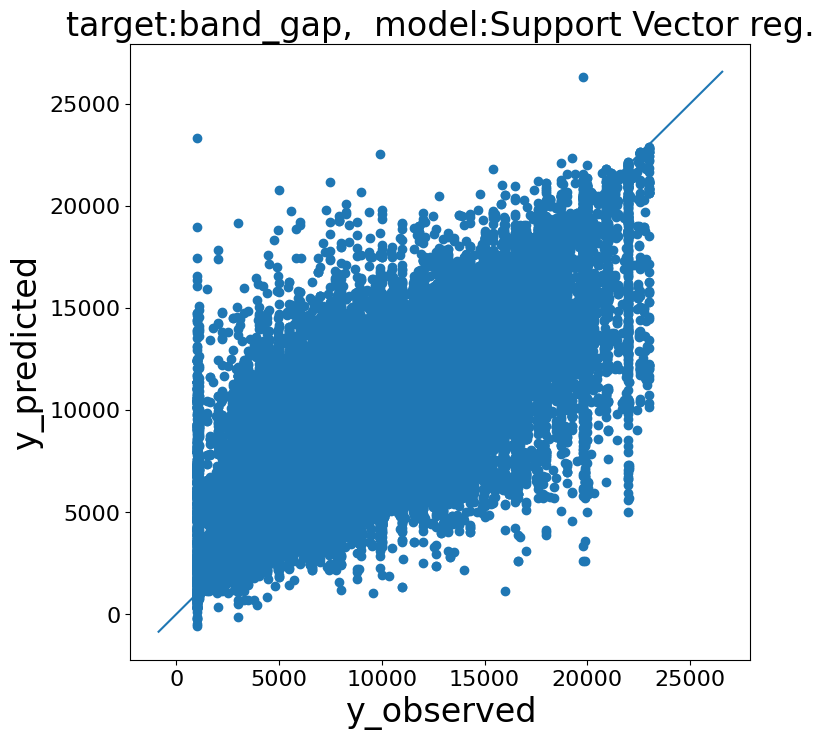

決定係数：0.765
RMSE：1846.72


In [278]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# グラフのラベルを定義
graph_title = "target:band_gap,  model:Support Vector reg."

# yyplot 作成関数
def yyplot(y_obs, y_pred):
    yvalues = np.concatenate([y_obs.flatten(), y_pred.flatten()])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    print(ymin, ymax, yrange)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_obs, y_pred)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    # plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    # plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title(graph_title, fontsize=24)
    plt.tick_params(labelsize=16)
    plt.show()

    return fig

# yyplot の実行例
np.random.seed(0)
y_obs = np.random.normal(size=(1000, 1))
y_pred = y_obs + np.random.normal(scale=0.3, size=(1000, 1))
# dataframe→numpy配列にするために.valuesを実行
fig = yyplot(df_y_observes.values, df_y_preds.values)

# 決定係数の算出
r2 = r2_score(df_y_observes.values, df_y_preds.values)
print("決定係数：" + '{:.3f}'.format(r2))

# RMSEの算出
mse = mean_squared_error(y_true=df_y_observes.values, y_pred=df_y_preds.values)
print("RMSE：" + '{:.2f}'.format(np.sqrt(mse)))

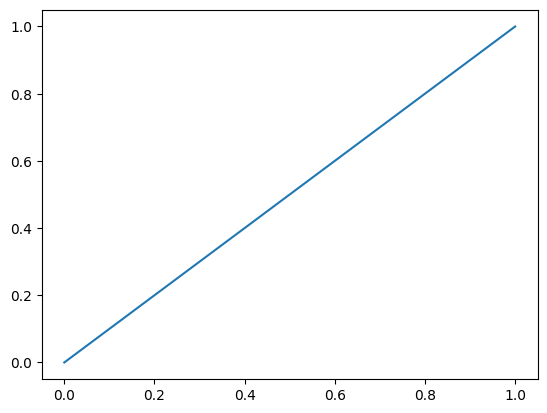

In [279]:
plt.plot([1, 0], [1,0])

In [42]:
df

,県,エリア,セット面の数,ブログ投稿数,口コミ数,スタッフ数,クーポン数,メニュー数,スタイル数,駅徒歩,コメントへの返信率,カット選択,カラー選択,トリートメント選択,パーマ選択,縮毛矯正選択,その他選択,ヘッドスパ選択,イルミナメニュー化の有無,Aujuaメニュー化の有無,addicthyメニュー化の有無,inoaメニュー化の有無,支出金額
0,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,4950
1,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,1,0,0,0,0,0,0,0,13990
2,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,1,0,0,0,0,0,0,0,0,4950
3,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,4950
4,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,4950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264093,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,0,1,0,0,0,0,5390
264094,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,0,1,0,0,0,0,4620
264095,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,3520
264096,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,3520


In [310]:
import random
tmp_index = random.randint(1, 100000)

tmp_df_X = df.iloc[tmp_index:tmp_index+1, :-1]
tmp_df_y = df.iloc[tmp_index:tmp_index+1, -1]
display(tmp_df_y)
tmp_df_X['県'] = tmp_df_X['県'].astype('category')
tmp_df_X['エリア'] = tmp_df_X['エリア'].astype('category')

63043    9200
Name: 支出金額, dtype: int64

In [311]:
_scores=[]
for model in best_models:
    _scores.append(model.predict(tmp_df_X))
_score=np.mean(_scores)

In [312]:
print(round(_score), float(tmp_df_y))

10068 9200.0


In [43]:
df.to_csv('/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/data_for_revise/prediction/payments/支出金額予測のデータフレーム完成.csv', index=False)

In [44]:
pd.read_csv('/Users/masudaniwabinari/Desktop/HPB_analysis_dashboard/data_for_revise/prediction/payments/支出金額予測のデータフレーム完成.csv')

,県,エリア,セット面の数,ブログ投稿数,口コミ数,スタッフ数,クーポン数,メニュー数,スタイル数,駅徒歩,コメントへの返信率,カット選択,カラー選択,トリートメント選択,パーマ選択,縮毛矯正選択,その他選択,ヘッドスパ選択,イルミナメニュー化の有無,Aujuaメニュー化の有無,addicthyメニュー化の有無,inoaメニュー化の有無,支出金額
0,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,4950
1,島根,松江,18,237,179,7,24,41,48,5.0,0.978,0,0,0,1,0,0,0,0,0,0,0,13990
2,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,1,0,0,0,0,0,0,0,0,4950
3,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,4950
4,島根,松江,18,237,179,7,24,41,48,5.0,0.978,1,0,0,0,0,0,0,0,0,0,0,4950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264093,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,0,1,0,0,0,0,5390
264094,福山・尾道,福山駅前・三吉周辺,2,0,33,2,0,23,0,NaN,1.000,0,0,0,0,0,0,1,0,0,0,0,4620
264095,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,3520
264096,福山・尾道,福山駅前・三吉周辺,1,0,43,1,0,12,0,NaN,1.000,1,0,0,0,0,0,0,0,0,0,0,3520
